In [1]:
import os
import cv2 
from pathlib import Path

In [ ]:
path = '/home/data/4DRADAR/ResShift/data/'
sets = ['train', 'valid', 'test']
for s in sets:
	pdir = Path(path, s+'data', 'retina_infersr', 'lq')
	fl_list = os.listdir(pdir)
	dstdir = str(pdir).replace('lq', 'lq_ref')
	for f in fl_list:
		im = cv2.imread(Path(pdir, f))
		dst = cv2.resize(im, (64, 64), fx=4, fy=4, interpolation=cv2.INTER_AREA)
		cv2.imwrite(Path(dstdir, f), dst)

In [77]:
path = '/home/data/4DRADAR/ResShift/results/retina5cm_mask0_infer_test/'
dstpath = '/home/data/4DRADAR/ResShift/results/retina5cm_mask0_infer_test0/'
fl_list = os.listdir(path)
for f in fl_list:
	im = cv2.imread(Path(path, f))
	dst = cv2.resize(im, (64, 64), fx=4, fy=4, interpolation=cv2.INTER_AREA)
	cv2.imwrite(Path(dstpath, f), dst)

In [5]:
org_retina = '/home/data/4DRADAR/ResShift/data/testdata/retina/lq/'
inpaint_retina_resize = '/home/data/4DRADAR/ResShift/data/testdata/retina_infersr/lq/'
sr_retina = '/home/data/4DRADAR/ResShift/results/retinasr_infer/'
gt_zed = '/home/data/4DRADAR/ResShift/data/testdata/retina_infersr/gt/'

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images(orgr, inpr, srr, zed):

    n_images = len(orgr)

    rows = n_images
    cols = 4

    fig = plt.figure(figsize = (5, 35))

    for i in range(rows):
        
        ax1 = fig.add_subplot(rows, cols, 4*i+1)
        ax2 = fig.add_subplot(rows, cols, 4*i+2)
        ax3 = fig.add_subplot(rows, cols, 4*i+3)
        ax4 = fig.add_subplot(rows, cols, 4*i+4)
        
        image1 = orgr[i]; image2 = inpr[i]; image3 = srr[i]; image4 = zed[i]

        ax1.imshow(image1)
        ax2.imshow(image2)
        ax3.imshow(image3)
        ax4.imshow(image4)
        ax1.set_title("Retina Org")
        #ax.axis('off')

    fig.tight_layout()

In [4]:
import cv2
im = '/home/data/4DRADAR/ResShift/data/validdata/retina/mask/Retina_data2_58_5cm.png'
cv2.imread(im).shape

(256, 256, 3)

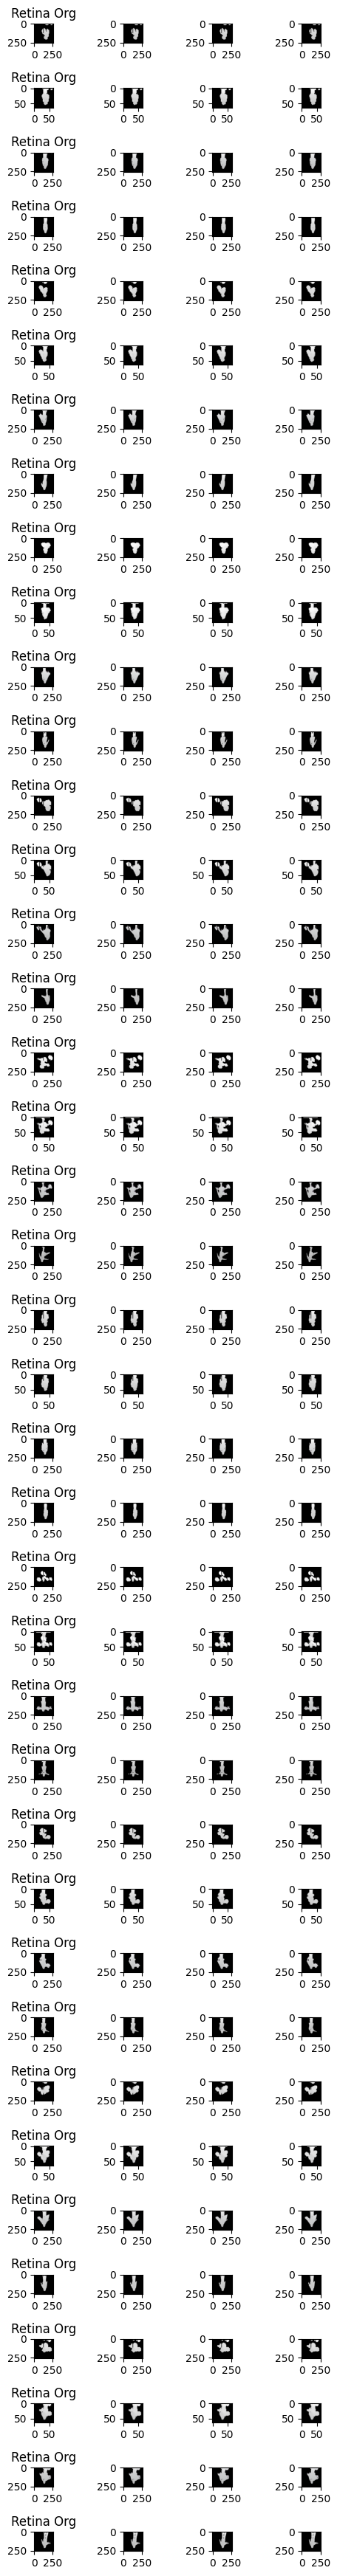

In [23]:
import matplotlib.pyplot as plt
import random 
N_IMAGES = 10

fl_list = os.listdir(org_retina)
orgr = inpr = srr = zed = []

for i in range(N_IMAGES):
	f = random.choice(fl_list)
	orgr.append(cv2.imread(Path(org_retina,f)))
	inpr.append(cv2.imread(Path(inpaint_retina_resize,f))) 
	srr.append(cv2.imread(Path(sr_retina,f)))
	zed.append(cv2.imread(Path(gt_zed,f)))

plot_images(orgr, inpr, srr, zed)

In [7]:
import random
fl_list = os.listdir(org_retina)
random.choice(fl_list)

'Retina_data4_1927_5cm.png'

In [76]:
path = '/home/data/4DRADAR/ResShift/data/validdata/retina/mask_0/'
src_path = '/home/data/4DRADAR/ResShift/data/validdata/retina/lq/'

fl_list = os.listdir(src_path)
for f in fl_list:
	im = cv2.imread(Path(src_path, f))
	mask = 255 - im; mask = (mask == 255)*255
	mask = 0.2126*mask[...,0] + 0.7152*mask[...,1] + 0.0722*mask[...,2]
	cv2.imwrite(Path(path, f), mask)

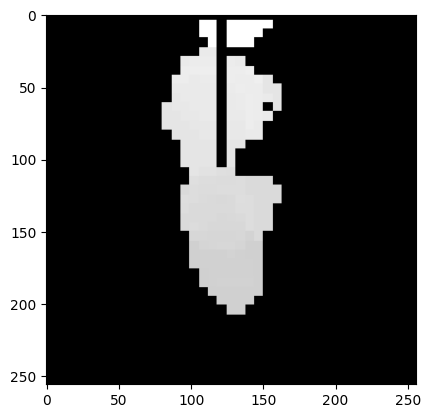

In [56]:
im = cv2.imread(Path(src_path, fl_list[0]))
plt.imshow(im)

In [59]:
im

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [60]:
mask = 255 - im
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

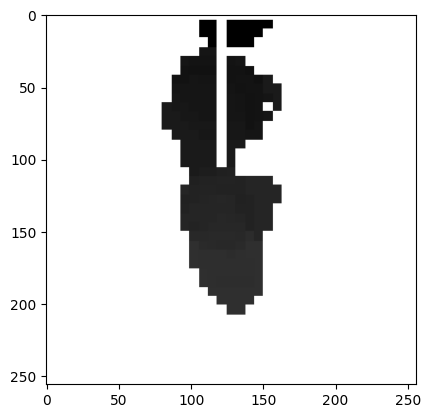

In [68]:
plt.imshow(mask)

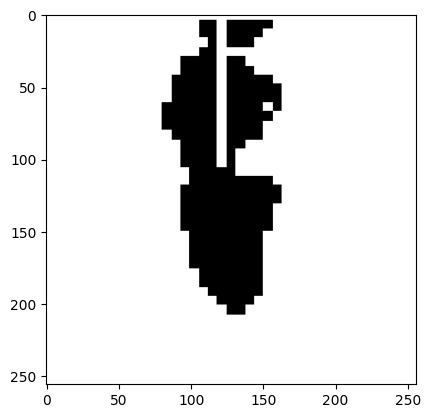

In [69]:
plt.imshow((mask == 255)*255)

In [50]:
gray_mask = (0.2126*mask[...,0] + 0.7152*mask[...,1] + 0.0722*mask[...,2])

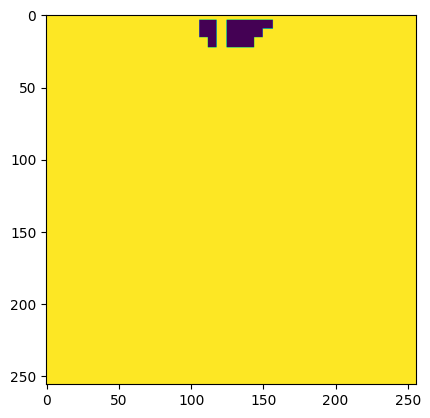

In [55]:
plt.imshow(gray_mask > 0)

In [46]:
gray_mask = (0.2126*mask[...,0] + 0.7152*mask[...,1] + 0.0722*mask[...,2])
np.repeat(np.expand_dims(gray_mask, 2),3,2).shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.99999999999997].


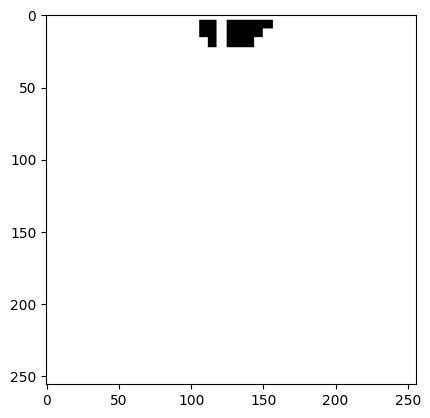

In [47]:
plt.imshow(np.repeat(np.expand_dims(gray_mask, 2),3,2))

In [78]:
path = '/home/data/4DRADAR/ResShift/results/retina5cm_mask0_infer_test/Retina_data2_245_5cm.png'
im = cv2.imread(path)

In [86]:
im.shape

(256, 256, 3)

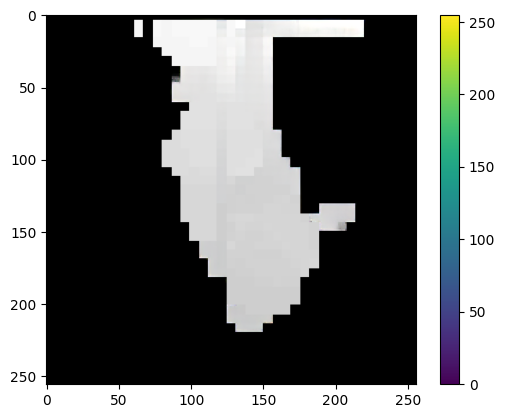

In [85]:
plt.imshow(im, cmap=)
plt.colorbar()

In [101]:
import struct
def Upload_rimg(file_path, resol):
    import scipy.ndimage
    with open(file_path, 'rb') as f:
        # Read the metadata (dimensions)
        width, height = struct.unpack('QQ', f.read(16))
        # Initialize an array to hold the range image data
        range_image = np.zeros((height, width), dtype=np.float16)
        
        # Read the range image data
        for row in range(height):
            for col in range(width):
                # Read 2 bytes (float16) and convert to float
                range_image[row, col] = np.frombuffer(f.read(2), dtype=np.float16)[0]
    range_image = scipy.ndimage.zoom(np.array(range_image, np.float32), resol / np.array(range_image.shape) , order=0)
    
    return range_image

rimg_path = '/home/data/4DRADAR/iln/data/rimg_dataset/4DSR_1cm/Lidar_sr_data/64_64_origin/test/Retina_data2_852_5cm.rimg'
Range_check_lr = Upload_rimg(rimg_path, 256)

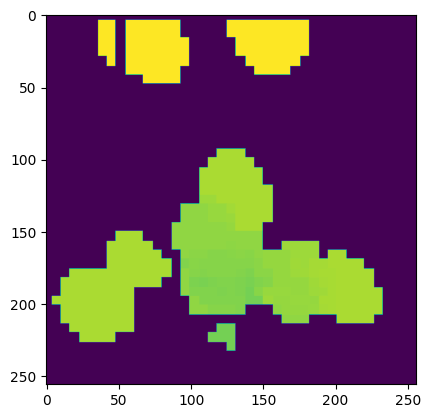

In [102]:
plt.imshow(Range_check_lr)

In [96]:
Range_check_lr.max()

3.2910156

In [100]:
from tifffile import imwrite
inpaint_path = '/home/data/4DRADAR/ResShift/results/retina5cm_mask0_infer_test/Retina_data2_852_5cm.png'
inpaint_ret = cv2.imread(inpaint_path)

inpaint_ret_unnorm = (inpaint_ret/255 * (Range_check_lr.max() - Range_check_lr.min())) + Range_check_lr.min()
imwrite('/home/data/4DRADAR/ResShift/results/rimg/Retina_data2_852_5cm_inpaint.png', inpaint_ret_unnorm)

sr_path = '/home/data/4DRADAR/ResShift/results/retinasr_infer_mask0/Retina_data2_852_5cm.png'
sr_ret = cv2.imread(sr_path)
sr_ret_unnorm = (sr_ret/255 * (Range_check_lr.max() - Range_check_lr.min())) + Range_check_lr.min()
imwrite('/home/data/4DRADAR/ResShift/results/rimg/Retina_data2_852_5cm_sr.png', sr_ret_unnorm)

In [95]:
inpaint_ret_unnorm.max()

3.291015625

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.291015625].


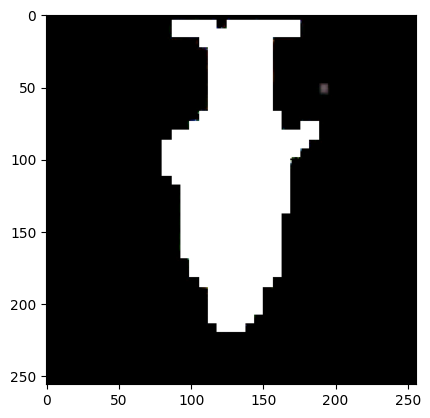

In [94]:
plt.imshow(inpaint_ret_unnorm)

In [10]:
from tifffile import imwrite
import os
import cv2 
from pathlib import Path

MIN = 0; MAX = 5
path = '/home/data/4DRADAR/ResShift/code/final/results/mask17/'
inpaint_path = path+'inpaint/'
sr_path = path + 'sr/'
os.makedirs(inpaint_path.replace('inpaint','inpaint_unnorm'), exist_ok=True)
os.makedirs(sr_path.replace('sr','sr_unnorm'), exist_ok=True)

for f in os.listdir(inpaint_path):
	inpaint_ret = cv2.imread(inpaint_path+f)
	inpaint_ret_unnorm = (inpaint_ret/255 * (MAX - MIN)) + MIN
	imwrite(Path(inpaint_path.replace('inpaint', 'inpaint_unnorm'), f), inpaint_ret_unnorm)

	sr_ret = cv2.imread(sr_path+f)
	sr_ret_unnorm = (sr_ret/255 * (MAX - MIN)) + MIN
	imwrite(Path(sr_path.replace('sr', 'sr_unnorm'), f), sr_ret_unnorm)